In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
IMAGE_SIZE = (224, 224)
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [5]:
model = keras.models.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 256)       0

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [11]:
model.fit(
    training_set,
    validation_data=test_set,
    epochs=1,  # You can adjust the number of epochs
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

163/163 [==============================] - 405s 2s/step - loss: 0.2668 - accuracy: 0.8942 - val_loss: 0.3288 - val_accuracy: 0.8574


In [12]:
from keras.preprocessing import image

img = image.load_img('chest_xray/test/PNEUMONIA/person1_virus_11.jpeg', target_size=IMAGE_SIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = x / 255.0  # Normalize the image
classes = model.predict(img_data)
result = int(classes[0][0])
if result == 0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")


1/1 [==============================] - 0s 100ms/step
Person is Affected By PNEUMONIA


In [14]:
true_labels = []
predicted_labels = []

for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)
    
    true_labels.extend(labels)  # Labels are already in the correct format (no need to use argmax)
    predicted_labels.extend(predictions)

# Convert true_labels and predicted_labels to numpy arrays
t_labels = np.array(true_labels)
p_labels = np.array(predicted_labels)

1/1 [==============================] - 0s 275ms/step


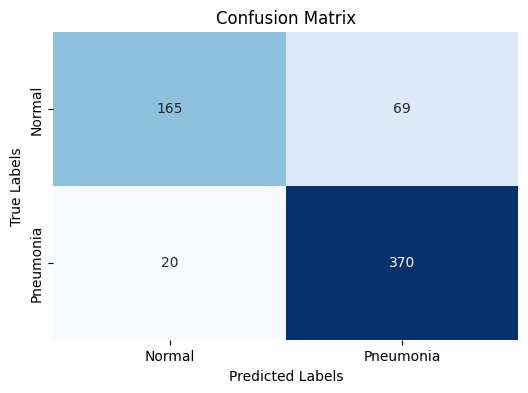

Accuracy: 0.8573717948717948


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Convert true_labels and predicted_labels to binary labels (0 or 1)
true_labels = np.array(true_labels)
predicted_labels = (np.array(predicted_labels) > 0.5).astype(int)  # Threshold at 0.5

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2) + 0.5, ['Normal', 'Pneumonia'])
plt.yticks(np.arange(2) + 0.5, ['Normal', 'Pneumonia'])
plt.show()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1_score = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.8428246013667426
Recall: 0.9487179487179487
F1 Score: 0.8926417370325694
